<h1>Exploratory Data Analysis - part 3</h1>

<h4> Goal : - What are the main characteristics which have the most impact on the car price?</h4>

<h2>1. Import Data </h2>

 Import libraries 

In [1]:
import pandas as pd


 load data and store in dataframe df:

In [2]:
path='car.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,3,2,164,audi,gas,std,four,sedan,fwd,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,4,2,164,audi,gas,std,four,sedan,4wd,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
del df['normalized-losses']

<h2>2. Descriptive Statistical Analysis</h2>

<p>When we begin to analyse data, it is important to first explore our data before we build machine learning models.

One of the easy way to explore data is to calculate some descriptive statistics for the data.

To get the statistical summery we can use the pandas method<h4>a. dataframe.describe()</h4></p>

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. 
    
    Any attributes with missing values are automatically skipped in these statistics.</p>

This will show:
<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>boundary of each of the quartiles(25%, 50%, 75%)</li>
    <li>the maximum value</li>
<ul>

We can apply the method "describe" as follows:

In [4]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,59.322565,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,0.000000,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,51.000000,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,102.000000,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,153.000000,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,204.000000,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,205.0,102.000000,59.322565,0.00,51.00,102.00,153.00,204.00
Unnamed: 0.1,205.0,102.000000,59.322565,0.00,51.00,102.00,153.00,204.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94


<h4>Some important Observations</h4>

Average values of
Horse Power 104, 
Highway mileage is 30.75, 
Price is 13000 Dollars apporx.

Price ranges from 5000 Dollers to 45000 Dollers approx.

<h4>b. df.describe(include=['object'])</h4>

The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows: df.describe(include=['object']). These are categorical variables.
 
For object types columns a different set of statistics is evaluated

unique - no of distinct object in the column

top - most frequently occuring object for that particular column

freq - no of times the top object appears in the column

In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159
fuel-system,205,8,mpfi,94


<h4>Some important Observations</h4>

1) Top make are toyota cars. 

2) Out of 205 cars 185 are Gas Fuel typed.

3) 202 cars have engine location in the front.

In [7]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,205,NaN,NaN,NaN,102,59.3226,0,51,102,153,204
Unnamed: 0.1,205,NaN,NaN,NaN,102,59.3226,0,51,102,153,204
symboling,205,NaN,NaN,NaN,0.834146,1.24531,-2,0,1,2,3
make,205,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel-type,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,205,3,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body-style,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive-wheels,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine-location,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Another method to check dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   Unnamed: 0.1       205 non-null    int64  
 2   symboling          205 non-null    int64  
 3   make               205 non-null    object 
 4   fuel-type          205 non-null    object 
 5   aspiration         205 non-null    object 
 6   num-of-doors       205 non-null    object 
 7   body-style         205 non-null    object 
 8   drive-wheels       205 non-null    object 
 9   engine-location    205 non-null    object 
 10  wheel-base         205 non-null    float64
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb-weight        205 non-null    int64  
 15  engine-type        205 non-null    object 
 16  num-of-cylinders   205 non

<h2>3. Visualization Using Box Plots</h2>

<h4>Boxplots are a good way to visualize categorical variables</h4>

<h3>Categorical variables</h3>

    1. These are variables that describe a 'characteristic' of a data and selected from a small group of categories. 
    
    2. The categorical variables can have the type "object" or "int64". (For example the rating attribute may have the values "Good, V.Good, Best" or "1 , 2 , 3")

To install seaborn we use the pip which is the python package manager.

In [9]:
%%capture
! pip install seaborn

 <h4>Import visualization packages "Matplotlib" and "Seaborn"</h4> Don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Let's look at the relationship between "body-style" and "price".

In [11]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

<AxesSubplot:xlabel='body-style', ylabel='price'>

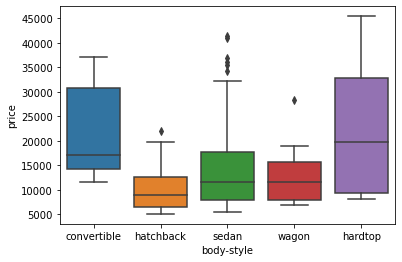

In [12]:
sns.boxplot(x="body-style", y="price", data=df)

<p>As the distributions of price between the different body-style categories have a significant overlap, body-style would not be a good predictor of price.</p>

The predictor variable :- Variable used to predict an outcome. In this case predictor variable is the body-style.
    
The target Variable :- Variable we are trying to predict. In this case our target variable is the price.

Let's examine engine "engine-location" and "price":</p>

<AxesSubplot:xlabel='engine-location', ylabel='price'>

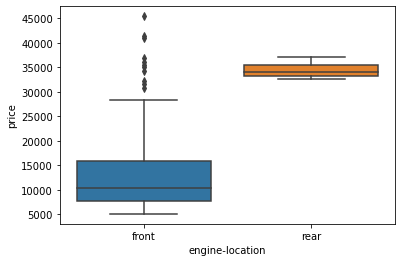

In [13]:
sns.boxplot(x="engine-location", y="price", data=df)

<h4>The distribution of price between these two engine-location categories are distinct. So engine-location can be taken as potential good predictor of price.</h4>

 Let's examine "drive-wheels" and "price".

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

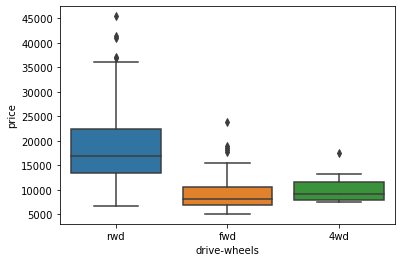

In [14]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

<p>Here we see that the distribution of price between front-wheel drive and four-wheel drive overlap, but rear-wheel drive and other categories are distinct; Therefore drive-wheels could potentially be a predictor of price.</p>

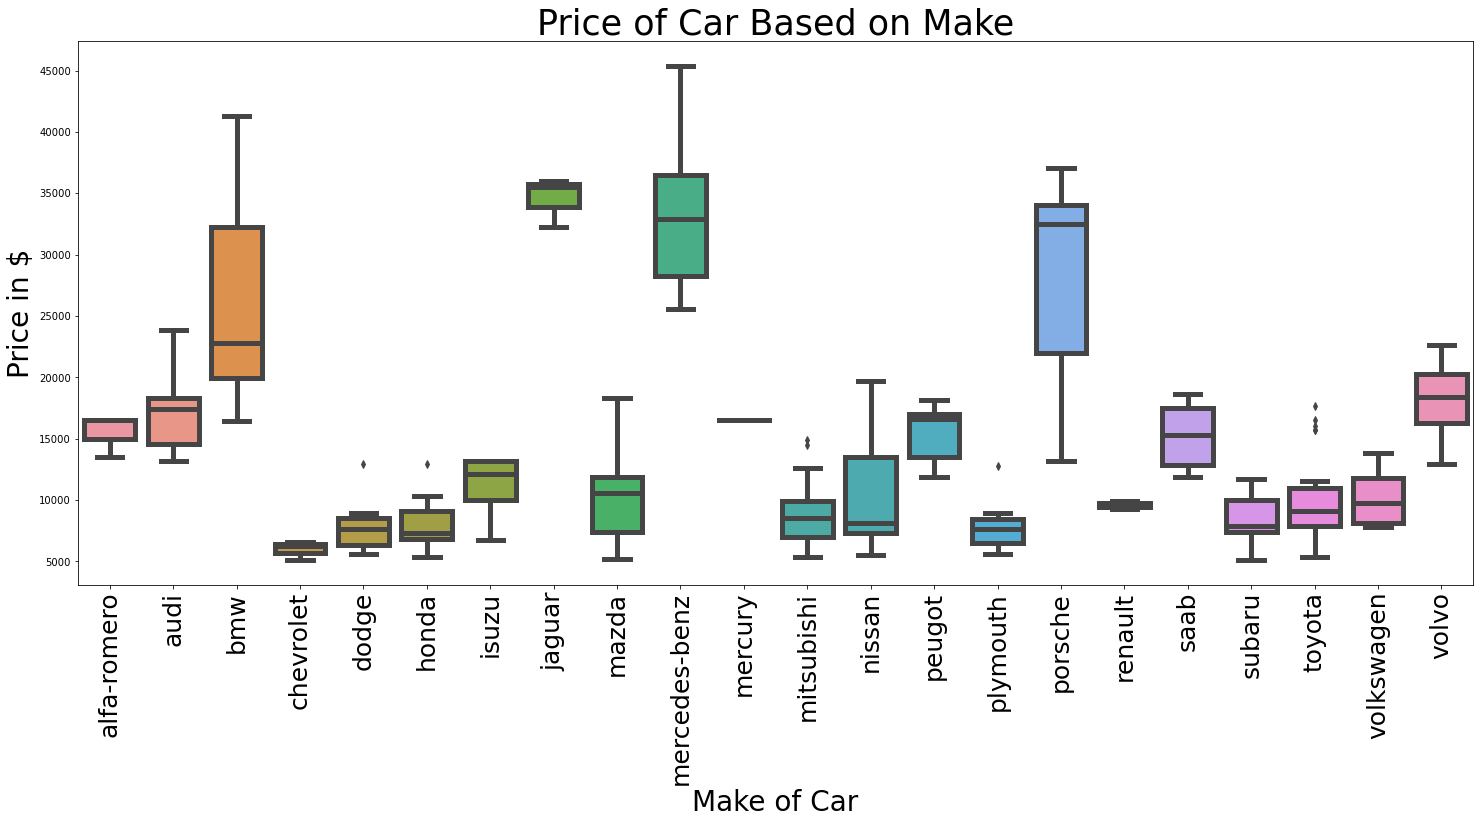

In [15]:
plt.rcParams['figure.figsize']=(25,10)
ax = sns.boxplot(x="make", y="price", data=df,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=28)
ax.set_ylabel('Price in $',fontsize=28)
plt.title('Price of Car Based on Make',fontsize=35)
ax.tick_params(axis='x',labelsize=25,rotation=90)

<h4>Some insights : -</h4>The expensive cars in the dataset are Mercedes Benz , BMW and Prosche. This is a very old dataset from 1985. So price of the cars are very low.

<h3>4. Value Counts</h3>

<p>Value-counts is a good way of understanding how many units of each unique value are there in a categorical variable.
    
   Let us apply the "value_counts" method on the column 'drive-wheels'. 
    
   Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. 
    
   We only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".</p>

In [16]:
df['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

Output is also pandas series. We can convert the series to a Dataframe using the method to_frmae() :

In [17]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


Value_counts() for the variable 'engine-location'.

In [18]:
df['engine-location'].value_counts().to_frame()

,engine-location
front,202
rear,3


In [19]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,202
rear,3


<p><h4>Engine location is not a good predictor variable for the price.</h4>
    
    
    This is because We only have 3 cars with a rear engine and 198 cars with an front engine, This result is skewed. So We   are not able to draw any conclusions about the price of the car using engine location attribute.</p>

<h4>Finding Missing Value using Value_counts()</h4>

In [20]:
df.describe(include=['object']).T

,count,unique,top,freq
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,3,four,114
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159
fuel-system,205,8,mpfi,94


In [21]:
df['num-of-doors'].unique()

array(['two', 'four', '?'], dtype=object)

In [22]:
df['num-of-doors'].value_counts()

four    114
two      89
?         2
Name: num-of-doors, dtype: int64

num-of-doors is missing in two places. We can replace the missing values with value 'four' as it is Mode(most frequently occures). 

If it is a numerical variable we may use mean to replace the missing value.

In [23]:
a=df['num-of-doors'].map({'two':2,'four':4,'?':4})
df['num-of-doors']=a

In [24]:
df['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

<h2 id="basic_grouping">5. Basics of Grouping</h2>

<p> The "groupby" method groups data by different categories.</p>

<p>For example, let's group by the variable "drive-wheels". 
    
    There are 3 different categories of drive wheels.</p>

In [25]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

<p>If we want to know, on average, which type of drive wheel is most valuable??
    
    We can group "drive-wheels" and then average them.</p>

<p>We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".</p>

In [26]:
df_group_one = df[['drive-wheels','body-style','price']]

We can then calculate the average price for each of the different categories of data.

In [27]:
# grouping results
df_group_by_dw = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_by_dw

,drive-wheels,price
0,4wd,10570.555556
1,fwd,9310.816667
2,rwd,19671.421053


<p>In this dataset, rear-wheel drive vehicles are, on average, the most expensive, 
    
    
   4-wheel and front-wheel are approximately the same in price.</p>

<p>We can also group with multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. </p>

In [28]:
# grouping results
#df_gptest = df[['drive-wheels','body-style','price']]
df_group_by_bs_dw = df_group_one.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_by_bs_dw

,drive-wheels,body-style,price
0,4wd,hatchback,10405.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9930.929825
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


<h4> Pivot Table</h4>

<p>This grouped data is much easier to visualize when it is made into a pivot table.</p>

<p> We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.</p>

<p>A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row.</p>

<p>In this case, we take drive-wheel variable as the rows of the table body-style as columns of the table:</p>

In [29]:
grouped_pivot = df_group_by_bs_dw.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN  10405.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.929825   
rwd              23949.6  24202.714286  14278.263158  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [30]:
df[df['body-style'] == 'convertible']

,Unnamed: 0,Unnamed: 0.1,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,0,3,alfa-romero,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,1,3,alfa-romero,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
72,72,72,3,mercedes-benz,gas,std,2,convertible,rwd,front,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056
128,128,128,3,porsche,gas,std,2,convertible,rwd,rear,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028
172,172,172,2,toyota,gas,std,2,convertible,rwd,front,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669
189,189,189,3,volkswagen,gas,std,2,convertible,fwd,front,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595


In [31]:
df[df['body-style'] == 'hardtop']

,Unnamed: 0,Unnamed: 0.1,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
69,69,69,0,mercedes-benz,diesel,turbo,2,hardtop,rwd,front,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
74,74,74,1,mercedes-benz,gas,std,2,hardtop,rwd,front,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400
98,98,98,2,nissan,gas,std,2,hardtop,fwd,front,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,8249
126,126,126,3,porsche,gas,std,2,hardtop,rwd,rear,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528
127,127,127,3,porsche,gas,std,2,hardtop,rwd,rear,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028
167,167,167,2,toyota,gas,std,2,hardtop,rwd,front,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,8449
168,168,168,2,toyota,gas,std,2,hardtop,rwd,front,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9639
170,170,170,2,toyota,gas,std,2,hardtop,rwd,front,...,146,mpfi,3.62,3.50,9.3,116,4800,24,30,11199


<p> We can fill these missing cells with the value 0. </p>

In [32]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000  10405.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9930.929825   
rwd              23949.6  24202.714286  14278.263158  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<h1>Thank you</h1>

In [33]:
df.to_csv('car.csv')